In [10]:
import pandas as pd
import numpy as np

In [11]:
GL_book=pd.ExcelFile('GL.xlsx')
df = GL_book.parse('Sheet1')

In [12]:
GL=df[['JE date','line descr','posted date','amount']]
GL.head(10)

,JE date,line descr,posted date,amount
0,2016-01-11,CA - CASH,2016-11-02,228.76
1,2016-02-11,CA - CASH,2016-11-03,92.23
2,2016-02-11,PT - PETTY CASH EXPENSE,2016-11-03,-15.89
3,2016-03-11,CA - CASH,2016-11-04,167.58
4,2016-04-11,CA - CASH,2016-11-05,927.25
5,2016-04-11,PT - PETTY CASH EXPENSE,2016-11-05,-48.58
6,2016-05-11,000196G201110001,2016-11-05,-1200.00
7,2016-05-11,CA - CASH,2016-11-06,426.09
8,2016-06-11,PT - PETTY CASH EXPENSE,2016-11-07,-38.48
9,2016-06-11,CA - CASH,2016-11-07,255.79


In [13]:
#GLc=GL.append(GL_grouped,ignore_index=True)
GL_amount_list=GL['amount'].tolist()


In [22]:
#GL_grouped=GL.groupby(['posted date']).sum()
#GL_grouped['posted date']=GL_grouped.index
from datetime import datetime
GL_grouped=[]

for i in GL.index:
    date1=GL['posted date'][i]
    d1=date1.to_datetime()
    for j in GL.index:
        date2=GL['posted date'][j]
        d2=date2.to_datetime()
        if  ((d2-d1).days)<2  and j>i:
            #print(i,j)
            val=GL['amount'][i]+GL['amount'][j]
            GL_grouped.append(val)

            
GLc=GL_amount_list+GL_grouped
np.savetxt("GL_amount.csv", GLc, delimiter=",",fmt='%f')
            
date1=GL['posted date'][13]
date2=GL['posted date'][14]
print(date1,date2)
d1=date1.to_datetime()
d2=date2.to_datetime()

print(d1,d2)
(d2-d1).days

d2.month

2016-11-11 00:00:00 2016-11-12 00:00:00
2016-11-11 00:00:00 2016-11-12 00:00:00


/Users/jay.ghorbani/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: to_datetime is deprecated. Use self.to_pydatetime()
  exec(code_obj, self.user_global_ns, self.user_ns)


11

In [15]:
# Importing the Deposit File
depo_excel=pd.ExcelFile('deposits.xlsx')
depo = depo_excel.parse('Sheet1')
#depo
depo_amount=depo['amount']
np.savetxt("depo_amount.csv", depo_amount, delimiter=",",fmt='%f')

In [16]:
# Importing the Withdrawal Files
wd_excel=pd.ExcelFile('withdrawal.xlsx')
wd = wd_excel.parse('Sheet1')
wd['amount']

0   -1200.0
1   -2000.0
2    -200.0
3    -170.6
4   -1200.0
5    -500.0
6   -2000.0
7    -850.0
8   -1300.0
Name: amount, dtype: float64

In [17]:
# Building the GLc and depo net
#GLc = GLc.rename(columns={'posted date': 'date'})
#pd.merge(GLc, depo, on=['amount'], how='right')
GLc[0]

228.76

In [18]:
# Building the GLc and wd net
#pd.merge(GLc, wd, on=['amount'], how='right')
GL_wd=np.zeros((len(GLc),wd.index.size))
GL_wd_T=np.zeros((len(GLc),1))


for i in range(0,len(GLc)):
    for j in wd.index:
        #print(i,j)
        if GLc[i]==wd['amount'][j]:
            #print(i,j)
            GL_wd[i,j]=1
    #GL_wd_T[i]=sum(GL_wd[i])
#GL_wd  
#np.sum(GL_wd, axis=1)


In [19]:
# Building the GLc and depo net
GL_depo=np.zeros((len(GLc),depo.index.size))
for i in range(0,len(GLc)):
    for j in depo.index:
        if GLc[i]==depo['amount'][j]:
            #print(i,j)
            GL_depo[i,j]=1 
            
GL_depo_rows=np.sum(GL_depo, axis=1) 
np.savetxt("GL_depo_rows.csv", GL_depo_rows, delimiter=",",fmt='%f')
np.savetxt("GL_depo.csv", GL_depo, delimiter=",",fmt='%f')

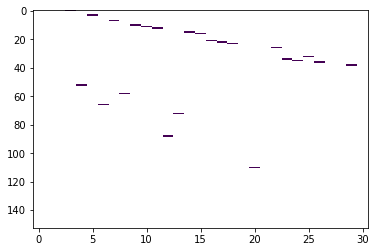

In [20]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
GL_depo[GL_depo == 0.0] = np.nan
plt.imshow(GL_depo,interpolation='nearest', aspect='auto')

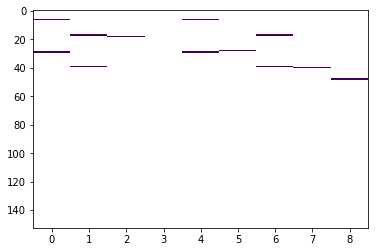

In [21]:
GL_wd[GL_wd == 0.0] = np.nan
plt.imshow(GL_wd,interpolation='nearest', aspect='auto')